In [1]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [90]:
data = pd.read_csv('haberman.csv',header=None)
data

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [106]:
data.rename(columns={0:'Age',1:'Op_Year',2:'axil_nodes',3:'Surv_status'},inplace=True)

In [107]:
data

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [108]:
data.isnull().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

In [109]:
data.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [110]:
X = data.iloc[:,:3]
X

,Age,Op_Year,axil_nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


In [111]:
Y = data.iloc[:,3:]
Y

,Surv_status
0,1
1,1
2,1
3,1
4,1
...,...
301,1
302,1
303,1
304,2


In [112]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [158]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [159]:
pred = model.predict(X_test)
pred

array([1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1])

In [160]:
y = Y_test['Surv_status'].values.tolist()

In [161]:
n = len(pred)
c1,c2 = 0,0
for i in range(len(pred)):
  if pred[i] == y[i]:
    print(True)
    c1+=1
  else:
    print(False)
    c2+=1

False
True
False
True
True
True
False
True
True
True
True
True
True
True
False
True
False
False
True
True
True
False
True
True
False
False
True
True
False
True
True
True
False
True
False
False
False
True
True
True
True
False
False
True
True
True
True
False
True
True
True
True
True
False
True
True
True
True
False
False
False
True
True
False
True
True
False
False
True
True
False
True
True
True
True
True
True
True
False
False
False
True
True
True
True
True
False
True
True
True
True
True


In [162]:
t = (c1/n)*100
f = (c2/n)*100

In [163]:
print(t)
print(f)

68.47826086956522
31.521739130434785


In [164]:
print(classification_report(y,pred,target_names=['Survived_5_years_or_longer','Died_within_5_years']))

                            precision    recall  f1-score   support

Survived_5_years_or_longer       0.69      0.90      0.78        58
       Died_within_5_years       0.65      0.32      0.43        34

                  accuracy                           0.68        92
                 macro avg       0.67      0.61      0.61        92
              weighted avg       0.68      0.68      0.65        92



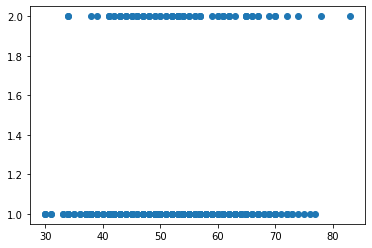

In [165]:
plt.scatter(X['Age'],Y)

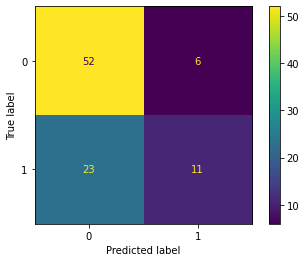

In [166]:
cm = confusion_matrix(y,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()